In [137]:
import pandas as pd
import os

experiments = ['standard_prompting', 'chain_of_thought', 'direct_feedback']#, 'standard_prompting_10']
data = [pd.read_csv('../results/' + experiment + '.csv') for experiment in experiments]
data = pd.concat(data).T.fillna(0)
data.loc['method'] = data.loc[data.index[0]]
print(data)
# data.columns = experiments
data = data.drop([data.index[0]])

                                  0                   1                   2  \
Unnamed: 0       standard_prompting  standard_prompting  standard_prompting   
1d_move_dp                        2                   2                   2   
1d_flip                           5                   7                   9   
1d_move_2p                        2                   4                   4   
1d_move_1p                        7                  11                  13   
1d_scale_dp                       1                   2                   4   
1d_fill                           5                  13                  19   
1d_hollow                         6                  10                  14   
1d_denoising_mc                   1                   1                   1   
1d_move_3p                        2                   8                  12   
choices                           1                   2                   3   
input_tokens                 129607              129

In [138]:
categories_names = "Move 1,Move 2,Move 3,Move Dynamic,Move 2 Towards,Fill,Padded Fill,Hollow,Flip,Mirror,Denoise,Denoise Multicolor,Pattern Copy,Pattern Copy Multicolor,Recolor by Odd Even,Recolor by Size,Recolor by Size Comparison,Scaling".split(',')
categories_dirs = "1d_move_1p,1d_move_2p,1d_move_3p,1d_move_dp,1d_move_2p_dp,1d_fill,1d_padded_fill,1d_hollow,1d_flip,1d_mirror,1d_denoising_1c,1d_denoising_mc,1d_pcopy_1c,1d_pcopy_mc,1d_recolor_oe,1d_recolor_cnt,1d_recolor_cmp,1d_scale_dp".split(',')


In [139]:
tokens = data.loc[['method', 'choices', 'input_tokens', 'output_tokens']]
tokens


,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4
method,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,chain_of_thought,chain_of_thought,chain_of_thought,chain_of_thought,chain_of_thought
choices,1,2,3,4,5,6,7,8,9,10,1,2,3,4,5
input_tokens,129607,129607,129607,129607,129607,129607,129607,129607,129607,129607,143122,143122,143122,143122,143122
output_tokens,50766.7,101533.4,152300.1,203066.8,253833.5,304600.2,355366.9,406133.6,456900.3,507667.0,276249.2,552498.4,828747.6,1104996.8,1381246.0


In [140]:
data = data.drop(['method', 'choices', 'input_tokens', 'output_tokens'])
data

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4
1d_move_dp,2,2,2,3,4,4,4,6,6,6,2,2,2,4,6
1d_flip,5,7,9,13,19,21,22,24,24,27,9,11,20,21,24
1d_move_2p,2,4,4,5,5,5,5,7,8,9,5,15,17,22,27
1d_move_1p,7,11,13,14,17,19,20,21,21,25,7,10,12,14,18
1d_scale_dp,1,2,4,6,6,7,7,7,7,7,4,4,7,10,12
1d_fill,5,13,19,22,22,24,26,27,28,30,5,11,14,17,23
1d_hollow,6,10,14,18,22,26,29,30,30,32,16,25,28,37,39
1d_denoising_mc,1,1,1,4,5,6,8,10,12,13,15,21,24,31,34
1d_move_3p,2,8,12,13,13,14,16,18,18,18,6,8,10,15,19
1d_denoising_1c,0,4.0,4.0,5.0,5.0,5.0,6.0,6.0,6.0,7.0,5.0,8.0,12.0,13.0,16.0


In [141]:
totals = data.sum(axis=0)
totals

0       31
1     62.0
2     82.0
3    103.0
4    118.0
5    133.0
6    145.0
7    159.0
8    163.0
9    178.0
0     77.0
1    120.0
2    153.0
3    191.0
4    226.0
dtype: object

In [142]:
rate = 100*totals/900
rate

0     3.444444
1     6.888889
2     9.111111
3    11.444444
4    13.111111
5    14.777778
6    16.111111
7    17.666667
8    18.111111
9    19.777778
0     8.555556
1    13.333333
2         17.0
3    21.222222
4    25.111111
dtype: object

In [143]:
tokens.loc['rate'] = rate
tokens

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4
method,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,chain_of_thought,chain_of_thought,chain_of_thought,chain_of_thought,chain_of_thought
choices,1,2,3,4,5,6,7,8,9,10,1,2,3,4,5
input_tokens,129607,129607,129607,129607,129607,129607,129607,129607,129607,129607,143122,143122,143122,143122,143122
output_tokens,50766.7,101533.4,152300.1,203066.8,253833.5,304600.2,355366.9,406133.6,456900.3,507667.0,276249.2,552498.4,828747.6,1104996.8,1381246.0
rate,3.444444,6.888889,9.111111,11.444444,13.111111,14.777778,16.111111,17.666667,18.111111,19.777778,8.555556,13.333333,17.0,21.222222,25.111111


In [144]:
tokens.loc['cost'] = tokens.loc['input_tokens']*0.00001 + tokens.loc['output_tokens']*0.00003
tokens.T

,method,choices,input_tokens,output_tokens,rate,cost
0,standard_prompting,1,129607,50766.7,3.444444,2.819071
1,standard_prompting,2,129607,101533.4,6.888889,4.342072
2,standard_prompting,3,129607,152300.1,9.111111,5.865073
3,standard_prompting,4,129607,203066.8,11.444444,7.388074
4,standard_prompting,5,129607,253833.5,13.111111,8.911075
5,standard_prompting,6,129607,304600.2,14.777778,10.434076
6,standard_prompting,7,129607,355366.9,16.111111,11.957077
7,standard_prompting,8,129607,406133.6,17.666667,13.480078
8,standard_prompting,9,129607,456900.3,18.111111,15.003079
9,standard_prompting,10,129607,507667.0,19.777778,16.52608


In [145]:
plot = tokens.T.copy()
# plot['method'] = plot.index
plot


,method,choices,input_tokens,output_tokens,rate,cost
0,standard_prompting,1,129607,50766.7,3.444444,2.819071
1,standard_prompting,2,129607,101533.4,6.888889,4.342072
2,standard_prompting,3,129607,152300.1,9.111111,5.865073
3,standard_prompting,4,129607,203066.8,11.444444,7.388074
4,standard_prompting,5,129607,253833.5,13.111111,8.911075
5,standard_prompting,6,129607,304600.2,14.777778,10.434076
6,standard_prompting,7,129607,355366.9,16.111111,11.957077
7,standard_prompting,8,129607,406133.6,17.666667,13.480078
8,standard_prompting,9,129607,456900.3,18.111111,15.003079
9,standard_prompting,10,129607,507667.0,19.777778,16.52608


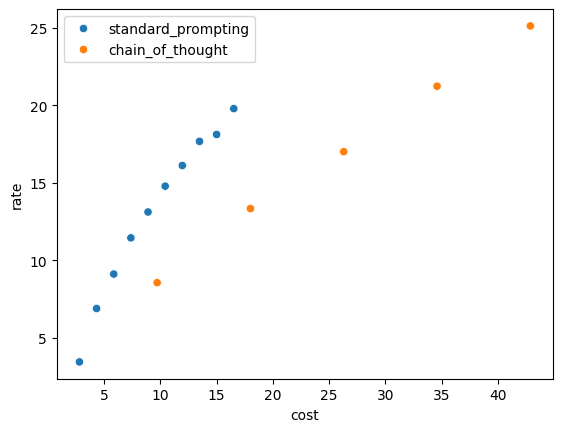

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(plot, x='cost', y='rate', hue='method')
plt.legend(loc='upper left')